In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

# Problem Statement

## Create a model for predicting mortality caused by Heart Failure.

In [361]:
df = pd.read_csv('heart_failure_data.csv')

In [362]:
df.head(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1


In [363]:
df.shape

(299, 13)

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [365]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Feature Engineering

### Checking for null values

In [366]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### No null values to handle

### Checking whether the target class is balanced or not

In [367]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

[Text(0, 0, 'Alive'), Text(0, 0, 'Dead')]

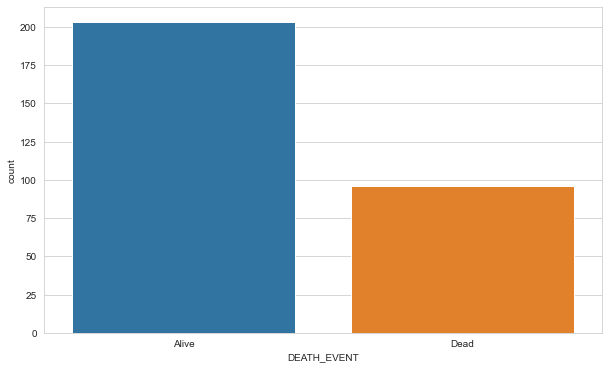

In [368]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="DEATH_EVENT",data=df)
plot.set_xticklabels(["Alive","Dead"])

#### Seems to be fine

## Performing EDA using Panda Profiling

In [23]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Heart Failure Prediction')
prof_report.to_widgets()

## Feature Engineering

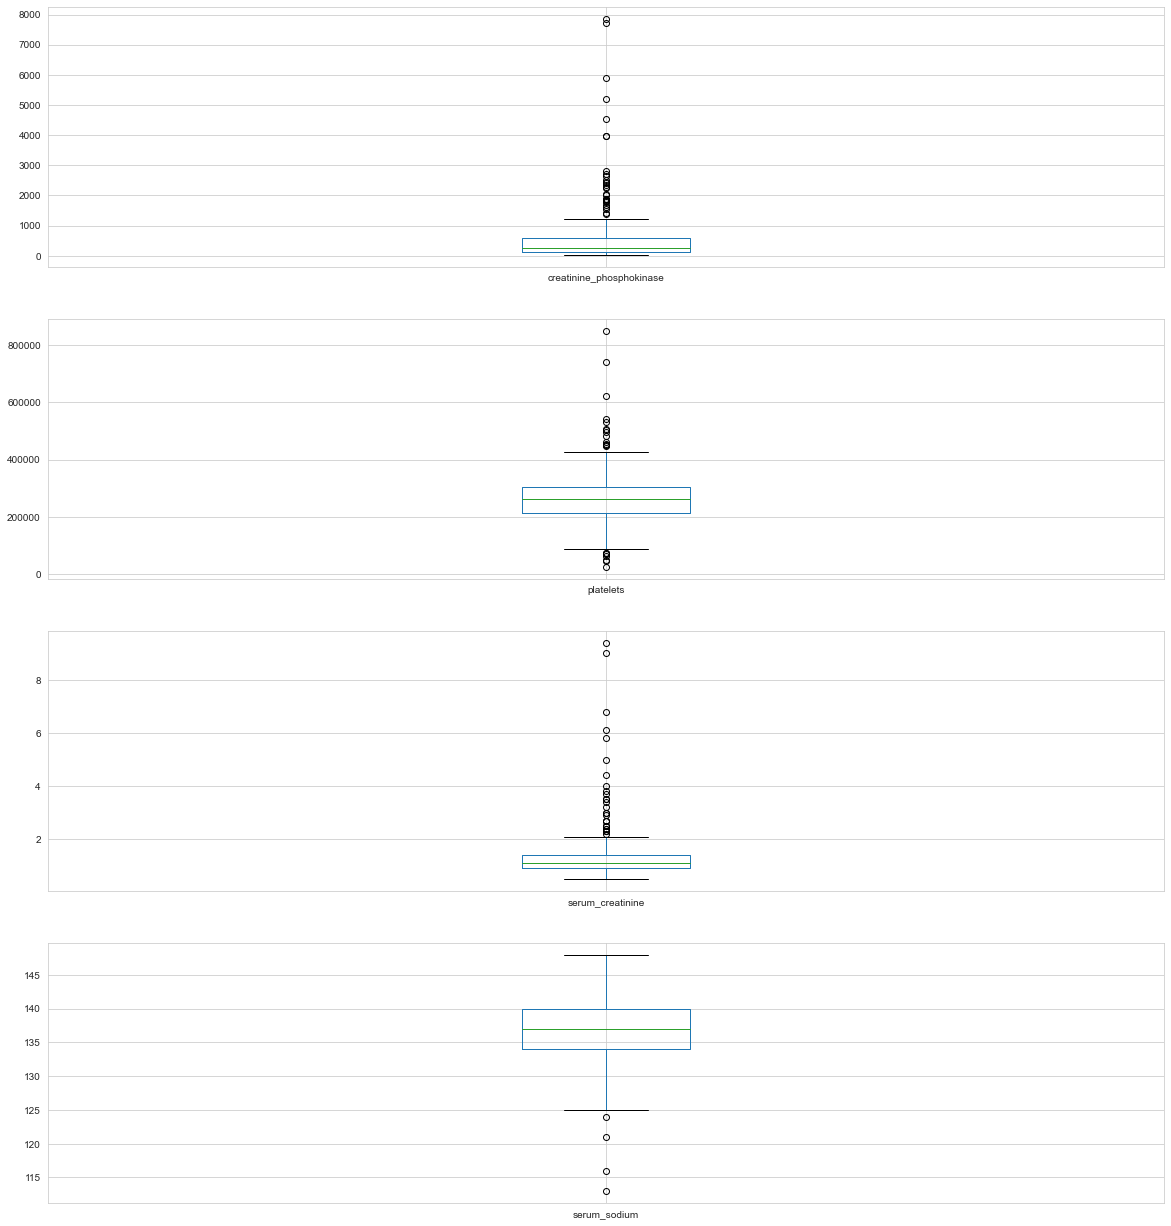

In [369]:
fig, axes = plt.subplots(4,1, sharex=False, figsize=(20,22))
df.boxplot(ax=axes[0],column='creatinine_phosphokinase')
df.boxplot(ax=axes[1],column='platelets')
df.boxplot(ax=axes[2],column='serum_creatinine')
df.boxplot(ax=axes[3],column='serum_sodium')

In [370]:
IQR=df['creatinine_phosphokinase'].quantile(0.75)-df['creatinine_phosphokinase'].quantile(0.25)
upper_bridge=df['creatinine_phosphokinase'].quantile(0.75)+(IQR*1.5)
indices=df[df['creatinine_phosphokinase']>upper_bridge].index
for i in indices.tolist():
    df['creatinine_phosphokinase'][i]=upper_bridge

In [371]:
IQR=df['platelets'].quantile(0.75)-df['platelets'].quantile(0.25)
lower_bridge=df['platelets'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['platelets'].quantile(0.75)+(IQR*1.5)
#print(lower_bridge), print(upper_bridge)
indices=df[df['platelets']>upper_bridge].index
for i in indices.tolist():
    df['platelets'][i]=upper_bridge
indices=df[df['platelets']<lower_bridge].index
for i in indices.tolist():
    df['platelets'][i]=lower_bridge

In [372]:
IQR=df.serum_creatinine.quantile(0.75)-df.serum_creatinine.quantile(0.25)
upper_bridge=df['serum_creatinine'].quantile(0.75)+(IQR*1.5)
indices=df[df['serum_creatinine']>upper_bridge].index
for i in indices.tolist():
    df['serum_creatinine'][i]=upper_bridge

In [373]:
IQR=df.serum_sodium.quantile(0.75)-df.serum_sodium.quantile(0.25)
lower_bridge=df['serum_sodium'].quantile(0.25)-(IQR*1.5)
indices=df[df['serum_sodium']<lower_bridge].index
for i in indices.tolist():
    df['serum_sodium'][i]=lower_bridge

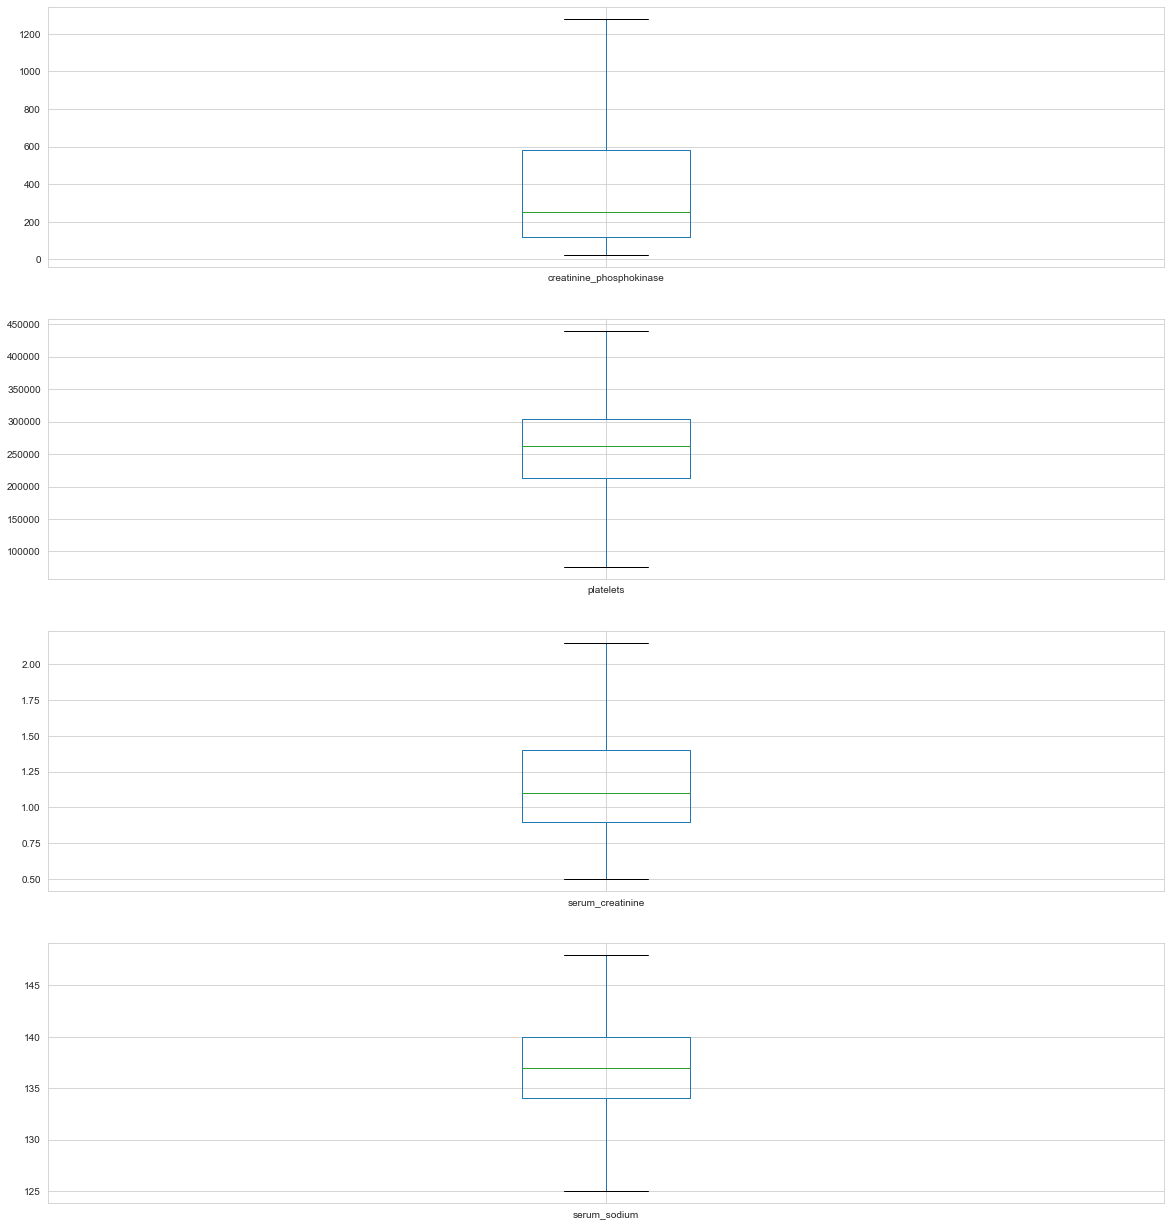

In [374]:
fig, axes = plt.subplots(4,1, sharex=False, figsize=(20,22))
df.boxplot(ax=axes[0],column='creatinine_phosphokinase')
df.boxplot(ax=axes[1],column='platelets')
df.boxplot(ax=axes[2],column='serum_creatinine')
df.boxplot(ax=axes[3],column='serum_sodium')

#### Using Heatmap

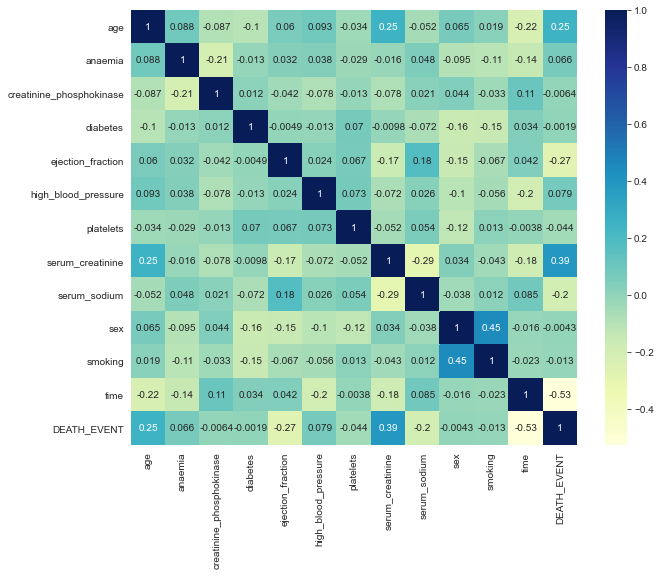

In [375]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [376]:
x=df[['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']]
y=df["DEATH_EVENT"]

In [377]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

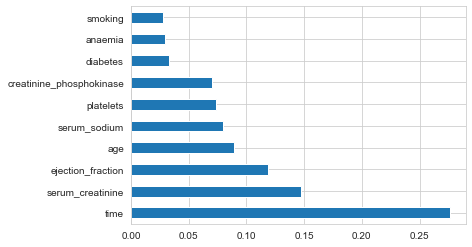

In [378]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Model Selection

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier
4. XG Boost Classifier
5. SVM Classifier
6. Logistic Regression
7. Artificial Neural Network

## Feature Selection

In [379]:
x=df[['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'smoking','time']]
y=df["DEATH_EVENT"]


### K Neighbors Classifier

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [381]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [382]:
standardScaler = StandardScaler()

x_train = standardScaler.fit_transform(x_train)

x_test= standardScaler.transform(x_test)

In [383]:
knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores.append(score.mean())

In [384]:
knn_scores

[0.6966403162055336,
 0.7233201581027668,
 0.7545454545454546,
 0.7634387351778656,
 0.7628458498023715,
 0.7324110671936759,
 0.7673913043478261,
 0.7450592885375494,
 0.7586956521739131,
 0.7541501976284585,
 0.7543478260869565,
 0.75,
 0.7411067193675889,
 0.7454545454545455,
 0.7543478260869565,
 0.7363636363636364,
 0.740909090909091,
 0.7409090909090909,
 0.7545454545454546,
 0.7369565217391304,
 0.759090909090909,
 0.7235177865612649,
 0.7458498023715415,
 0.7365612648221345,
 0.7320158102766798,
 0.7322134387351779,
 0.7278656126482214,
 0.7233201581027668,
 0.7278656126482214]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

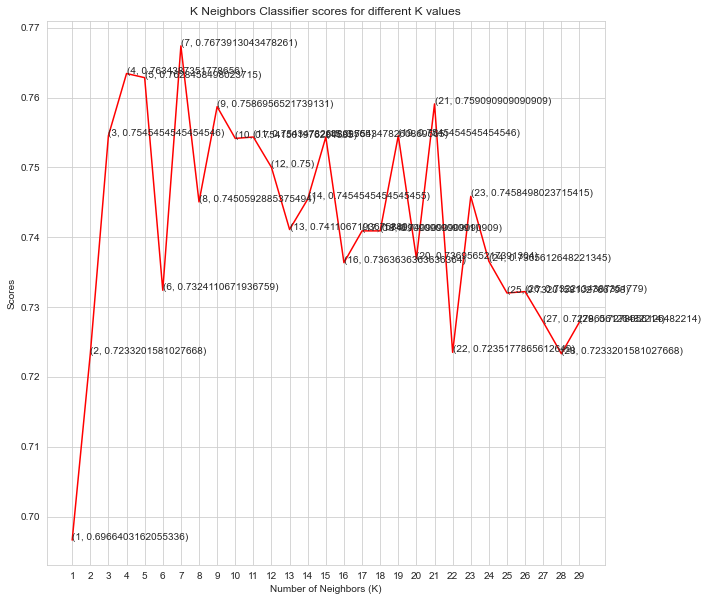

In [385]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1, 30)], knn_scores, color = 'red')
for i in range(1,30):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [386]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [387]:
error_rate

[0.21333333333333335,
 0.25333333333333335,
 0.24,
 0.21333333333333335,
 0.25333333333333335,
 0.2,
 0.21333333333333335,
 0.21333333333333335,
 0.2,
 0.22666666666666666,
 0.21333333333333335,
 0.22666666666666666,
 0.2,
 0.21333333333333335,
 0.24,
 0.22666666666666666,
 0.22666666666666666,
 0.21333333333333335,
 0.22666666666666666,
 0.24,
 0.22666666666666666,
 0.24,
 0.21333333333333335,
 0.25333333333333335,
 0.21333333333333335,
 0.22666666666666666,
 0.2,
 0.22666666666666666,
 0.2]

Text(0.5, 1.0, 'Error rate for different K values')

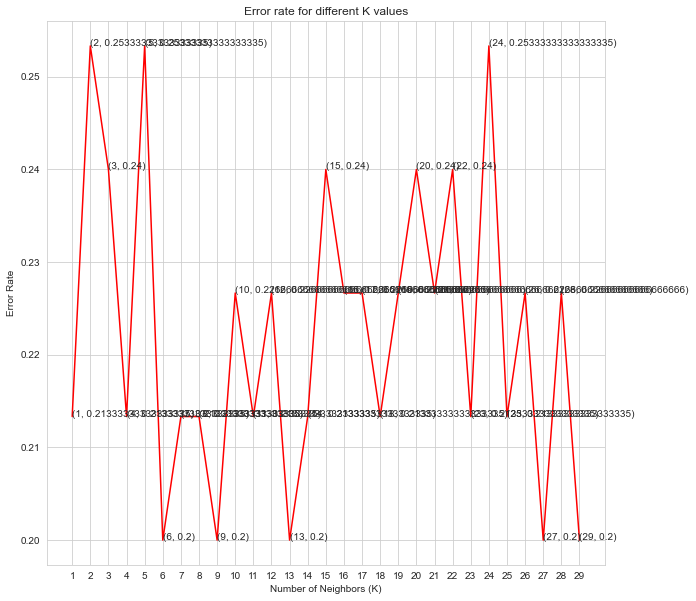

In [388]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1, 30)],error_rate, color = 'red')
for i in range(1,30):
    plt.text(i, error_rate[i-1], (i, error_rate[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Error rate for different K values')

#### k=9 could be an ideal choice as it gives less error rate and more accuracy

In [389]:
knnclassifier = KNeighborsClassifier(n_neighbors=9)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.8

In [390]:
print(confusion_matrix(y_test,y_pred))

[[51  4]
 [11  9]]


In [391]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        55
           1       0.69      0.45      0.55        20

    accuracy                           0.80        75
   macro avg       0.76      0.69      0.71        75
weighted avg       0.79      0.80      0.78        75



### Decision Tree

In [392]:
from sklearn.tree import DecisionTreeClassifier

In [393]:
#No need for standardization for this algorithm
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [394]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [395]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16690704059401523


<Figure size 1440x1152 with 0 Axes>

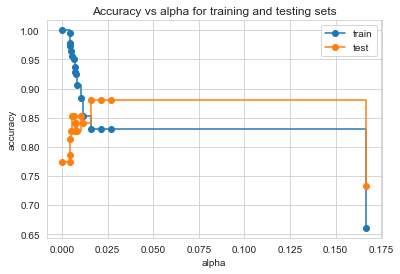

In [396]:
plt.figure(figsize=(20,16))
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [397]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.025)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.025, random_state=0)

In [398]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.88

In [399]:
print(confusion_matrix(y_test,pred))

[[52  3]
 [ 6 14]]


In [400]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        55
           1       0.82      0.70      0.76        20

    accuracy                           0.88        75
   macro avg       0.86      0.82      0.84        75
weighted avg       0.88      0.88      0.88        75



### RandomForestClassifier

In [463]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [464]:
x.columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'smoking', 'time'],
      dtype='object')

In [479]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)     #Utilizes all the cores of the CPU
rf_p_dist={'max_depth':[3,5,10,None],    #None means till full depth
              'n_estimators':[10,20,30,40],   # Number of Decision Trees
              'max_features':randint(1,12),   # AS I have 12 features
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

In [480]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):   #p_distr is the different set of parameters
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [481]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 15, x, y)

In [482]:
rf_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 10}

In [483]:
rf_ht_score

0.7390395480225989

In [494]:
classifier=RandomForestClassifier(n_jobs=-1, n_estimators=10,bootstrap= True,criterion='entropy',max_depth=5,max_features=2,min_samples_leaf=1)

In [495]:
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=2,
                       n_estimators=10, n_jobs=-1)

In [496]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)

[[53  2]
 [ 4 16]]
0.92


In [497]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.89      0.80      0.84        20

    accuracy                           0.92        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.92      0.92      0.92        75



In [498]:
import pickle
pickle.dump(model, open('heartFailurea92r80.pkl','wb'))

### XG Boost

In [499]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [500]:
classifier=xgboost.XGBClassifier()

In [501]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.01,0.001,0.0001,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [502]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [503]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [504]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[19:15:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [505]:
classifier=xgboost.XGBClassifier(max_depth=None,subsample=None,n_estimators=100,learning_rate=None,min_child_weight=None, random_state=0,reg_alpha=0, reg_lambda=1)

In [506]:
classifier.fit(X_train, y_train)

[19:15:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [507]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)

[[47  8]
 [ 2 18]]
0.8666666666666667


In [508]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        55
           1       0.69      0.90      0.78        20

    accuracy                           0.87        75
   macro avg       0.83      0.88      0.84        75
weighted avg       0.89      0.87      0.87        75



In [509]:
import pickle
pickle.dump(model, open('heartFailure872r90.pkl','wb'))

### Logisitic Regression

In [510]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [511]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833755 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.828429 (0.060553) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.828314 (0.055721) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.822644 (0.059798) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.827318 (0.058902) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.829387 (0.061360) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.827203 (0.059782) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.830613 (0.053706) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.821609 (0.063807) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.831609 (0.057734) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.832797 (0.053228) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.829387 (0.055663) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.831533 (0.054956) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.824943 (0.054493) wi

In [517]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [533]:
logisticRegr = LogisticRegression(C=1.0,penalty="l2",solver='liblinear')

In [534]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [535]:
predictions = logisticRegr.predict(X_test)

In [536]:
cm=confusion_matrix(y_test, predictions)
print(cm)

[[50  5]
 [ 5 15]]


In [537]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.75      0.75      0.75        20

    accuracy                           0.87        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.87      0.87      0.87        75



### SVM

In [512]:
from sklearn.svm import SVC
model = SVC()

In [513]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [514]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [515]:
from sklearn.model_selection import GridSearchCV

In [516]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [285]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.674 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.717 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.717 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.717 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.717 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.756 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.717 total time=   0.0s
[CV 2/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [538]:
model=SVC(C=1000,gamma=0.001,kernel="rbf")

In [539]:
model.fit(X_train,y_train)

SVC(C=1000, gamma=0.001)

In [540]:
predictions = model.predict(X_test)

In [541]:
print(confusion_matrix(y_test,predictions))

[[55  0]
 [20  0]]


In [542]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        55
           1       0.00      0.00      0.00        20

    accuracy                           0.73        75
   macro avg       0.37      0.50      0.42        75
weighted avg       0.54      0.73      0.62        75



### Neural Networks

In [543]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler


In [544]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)
standardScaler = StandardScaler()

x_train = standardScaler.fit_transform(x_train)

x_test= standardScaler.transform(x_test)

In [545]:
df.shape

(299, 13)

In [553]:
model =Sequential()
# model.add(Dense(30, input_dim=6, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(15,activation="relu"))
model.add(Dropout(0.8))
model.add(Dense(15,activation="relu"))
model.add(Dropout(0.7))
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(5,activation="relu"))


#Multi non exclusive class classification
model.add(Dense(1,activation="sigmoid"))
adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam")

In [554]:
import tensorflow
from IPython.display import clear_output
class PlotLearning(tensorflow.keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [555]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10)

In [556]:
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

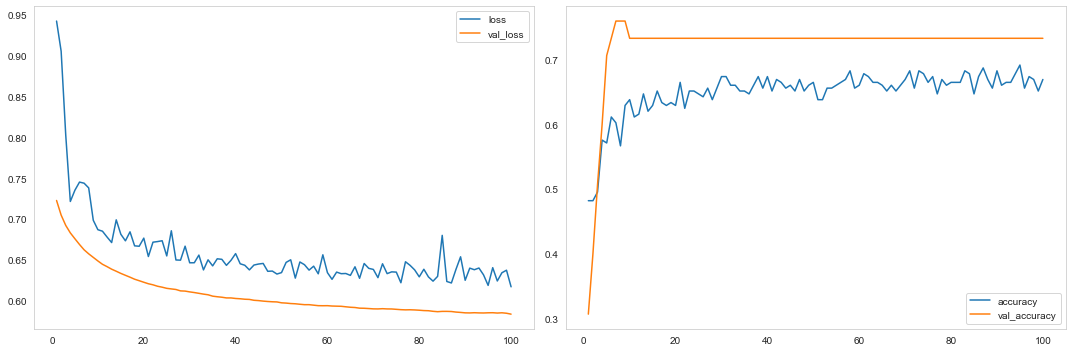

In [557]:
model.fit(x=x_train,y=y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[early_stop,PlotLearning()],batch_size=15)

In [558]:
 predictions=model.predict_classes(x_test)

In [559]:
 print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        55
           1       0.00      0.00      0.00        20

    accuracy                           0.73        75
   macro avg       0.37      0.50      0.42        75
weighted avg       0.54      0.73      0.62        75



## Final Model Selected-XG Boost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101)

classifier=xgboost.XGBClassifier(max_depth=None,subsample=None,n_estimators=100,learning_rate=None,min_child_weight=None, random_state=0,reg_alpha=0, reg_lambda=1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)